In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Sales.csv")
df.head()

<ipython-input-4-1ddbaaa67972>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,13,14,15,17,18,21,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Sales.csv")


,Date,Timestamp,Invoice_No.,Payment_Type,Order_Type,Area,Item_Name,Price,Qty.,Sub_Total,...,Address,GST,Assign_To,Non_Taxable,SGST_Rate,SGST_Amount,CGST_Rate,CGST_Amount,Service_Charge_Rate,Service_Charge_Amount
0,2024-01-28,2024-01-29 02:25:22,21573,Cash,Dine In,Dining,ORANGE JUICE,285.71,1.0,285.71,...,NaN,NaN,NaN,0.0,2.5,3.52,2.5,3.52,10.0,14.07
1,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,Iced Latte (350 ML),214.29,1.0,214.29,...,NaN,NaN,NaN,0.0,2.5,5.36,2.5,5.36,10.0,21.43
2,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,ALMOND MILK (200 ML),85.71,1.0,85.71,...,NaN,NaN,NaN,0.0,2.5,2.14,2.5,2.14,10.0,8.57
3,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Chicken Calzone,66.67,1.0,66.67,...,NaN,NaN,Allahbaksh Shaikh,0.0,2.5,1.67,2.5,1.67,10.0,6.67
4,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Coconut Nankhatai (with Egg),285.71,1.0,285.71,...,NaN,NaN,Allahbaksh Shaikh,0.0,2.5,7.14,2.5,7.14,10.0,28.57


In [5]:
start_index = 6077
df = df[:start_index]

In [6]:
(df.isnull().sum()*100)/df.shape[0]

Date                       0.032911
Timestamp                  0.032911
Invoice_No.                0.032911
Payment_Type               0.032911
Order_Type                 0.032911
Area                      22.050354
Item_Name                  0.032911
Price                      0.032911
Qty.                       0.032911
Sub_Total                  0.032911
Discount                   0.032911
Tax                        0.032911
Final_Total                0.032911
Status                     0.032911
Table_No.                 29.833800
Server_Name                0.032911
Covers                     0.032911
Variation                 19.236465
Category                   0.032911
HSN                      100.000000
Phone                     56.277769
Name                      48.214580
Address                   84.202732
GST                      100.000000
Assign_To                 67.220668
Non_Taxable                0.032911
SGST_Rate                  0.032911
SGST_Amount                0

In [7]:
# null_sum = df.isnull().sum()

# # Filter out columns where the sum of null values exceeds the threshold (e.g., 90)
# columns_to_drop = null_sum[null_sum >= 90].index

# # Drop the columns
# df.drop(columns=columns_to_drop)

columns_to_drop = ['HSN', 'GST', 'Assign_To', 'Address', 'Phone']
df.drop(columns=columns_to_drop, inplace=True)

<ipython-input-7-c61581976837>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


In [8]:
df = df.drop('Variation', axis=1)

In [9]:
(df.isnull().sum()*100)/df.shape[0]

Date                      0.032911
Timestamp                 0.032911
Invoice_No.               0.032911
Payment_Type              0.032911
Order_Type                0.032911
Area                     22.050354
Item_Name                 0.032911
Price                     0.032911
Qty.                      0.032911
Sub_Total                 0.032911
Discount                  0.032911
Tax                       0.032911
Final_Total               0.032911
Status                    0.032911
Table_No.                29.833800
Server_Name               0.032911
Covers                    0.032911
Category                  0.032911
Name                     48.214580
Non_Taxable               0.032911
SGST_Rate                 0.032911
SGST_Amount               0.032911
CGST_Rate                 0.032911
CGST_Amount               0.032911
Service_Charge_Rate       0.032911
Service_Charge_Amount     0.032911
dtype: float64

In [10]:
columns_to_fill_na = ['Name']
df[columns_to_fill_na] = df[columns_to_fill_na].fillna("NA")

In [11]:
columns_to_fill_na = ['Table_No.']
df[columns_to_fill_na] = df[columns_to_fill_na].fillna(0)

In [12]:
df['Area'] = df['Area'].where(
    df['Order_Type'] != 'Pick Up',
    np.where(df['Order_Type'] == 'Dine In', 'Dining', 'Swiggy')
)

In [13]:
df.head()

,Date,Timestamp,Invoice_No.,Payment_Type,Order_Type,Area,Item_Name,Price,Qty.,Sub_Total,...,Covers,Category,Name,Non_Taxable,SGST_Rate,SGST_Amount,CGST_Rate,CGST_Amount,Service_Charge_Rate,Service_Charge_Amount
0,2024-01-28,2024-01-29 02:25:22,21573,Cash,Dine In,Dining,ORANGE JUICE,285.71,1.0,285.71,...,0.0,JUICES,sanket rathod,0.0,2.5,3.52,2.5,3.52,10.0,14.07
1,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,Iced Latte (350 ML),214.29,1.0,214.29,...,0.0,Cold Coffee,NA,0.0,2.5,5.36,2.5,5.36,10.0,21.43
2,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,ALMOND MILK (200 ML),85.71,1.0,85.71,...,0.0,Milk,NA,0.0,2.5,2.14,2.5,2.14,10.0,8.57
3,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Chicken Calzone,66.67,1.0,66.67,...,1.0,Food Menu,neel,0.0,2.5,1.67,2.5,1.67,10.0,6.67
4,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Coconut Nankhatai (with Egg),285.71,1.0,285.71,...,1.0,Sweet,neel,0.0,2.5,7.14,2.5,7.14,10.0,28.57


In [14]:
df.shape

(6077, 26)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(6075, 26)

In [17]:

# Specify the columns to keep
columns_to_keep = ['Date', 'Timestamp', 'Item_Name']

# Drop columns not in the specified list
df2 = df[columns_to_keep]


In [18]:
df2

,Date,Timestamp,Item_Name
0,2024-01-28,2024-01-29 02:25:22,ORANGE JUICE
1,2024-01-28,2024-01-29 02:17:11,Iced Latte (350 ML)
2,2024-01-28,2024-01-29 02:17:11,ALMOND MILK (200 ML)
3,2024-01-28,2024-01-29 02:11:30,Chicken Calzone
4,2024-01-28,2024-01-29 02:11:30,Coconut Nankhatai (with Egg)
...,...,...,...
6070,2024-01-31,2024-01-31 03:21:07,Hot Chocolate (250 Ml)
6071,2024-01-31,2024-01-31 03:18:00,Iced Americano (350 Ml)
6072,2024-01-31,2024-01-31 03:13:07,Baked Vada Pav
6073,2024-01-31,2024-01-31 03:13:07,Baked Pav Bhaji


In [19]:

# Convert 'Date' and 'Timestamp' to datetime format
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

# Create 'Weekend_Weekday' column
df2['Weekend_Weekday'] = df2['Date'].dt.day_name()  # Get the day name

# Create 'Period' column
df2['Period'] = pd.cut(df2['Timestamp'].dt.hour,
                       bins=[0, 12, 17, 24],
                       labels=['Morning', 'Afternoon', 'Evening'],
                       include_lowest=True)


<ipython-input-19-ad2f7bdf6e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'])
<ipython-input-19-ad2f7bdf6e6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])
<ipython-input-19-ad2f7bdf6e6c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [20]:
df2

,Date,Timestamp,Item_Name,Weekend_Weekday,Period
0,2024-01-28,2024-01-29 02:25:22,ORANGE JUICE,Sunday,Morning
1,2024-01-28,2024-01-29 02:17:11,Iced Latte (350 ML),Sunday,Morning
2,2024-01-28,2024-01-29 02:17:11,ALMOND MILK (200 ML),Sunday,Morning
3,2024-01-28,2024-01-29 02:11:30,Chicken Calzone,Sunday,Morning
4,2024-01-28,2024-01-29 02:11:30,Coconut Nankhatai (with Egg),Sunday,Morning
...,...,...,...,...,...
6070,2024-01-31,2024-01-31 03:21:07,Hot Chocolate (250 Ml),Wednesday,Morning
6071,2024-01-31,2024-01-31 03:18:00,Iced Americano (350 Ml),Wednesday,Morning
6072,2024-01-31,2024-01-31 03:13:07,Baked Vada Pav,Wednesday,Morning
6073,2024-01-31,2024-01-31 03:13:07,Baked Pav Bhaji,Wednesday,Morning


In [21]:
# Convert 'Timestamp' column to datetime if it's not already in datetime format
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

# Sort the dataframe by the 'Timestamp' column
df2 = df2.sort_values(by='Timestamp')

# Assign a unique transaction ID to each group of rows with the same timestamp
df2['Transaction'] = df2.groupby('Timestamp').ngroup() + 1


<ipython-input-21-242ce538755d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])


In [22]:
df2.head()

,Date,Timestamp,Item_Name,Weekend_Weekday,Period,Transaction
5577,2024-01-01,2024-01-01 02:44:21,Papparoti (Plain),Monday,Morning,1
5578,2024-01-01,2024-01-01 02:44:21,Gluten Free Hazelnut Brownie,Monday,Morning,1
5576,2024-01-01,2024-01-01 02:44:21,Berliner Mix 3 Pcs (Blueberry Cheese Cake Berl...,Monday,Morning,1
5575,2024-01-01,2024-01-01 02:44:21,Berliner Mix 3 Pcs (Lotus Biscoff Berliner),Monday,Morning,1
5574,2024-01-01,2024-01-01 02:50:49,Yellow Banana Chips 60 Gm,Monday,Morning,2


In [23]:
from mlxtend.frequent_patterns import association_rules, apriori # for mining frequent itemsets and association rule

import warnings
warnings.filterwarnings("ignore")

In [24]:
# counting the number of unique transactions
print('The total number of unique transactions is ', df2['Transaction'].nunique())

# counting the number of selling items
print('The total number of unique items is ', df2['Item_Name'].nunique())

The total number of unique transactions is  2889
The total number of unique items is  192


In [25]:
df2.head()

,Date,Timestamp,Item_Name,Weekend_Weekday,Period,Transaction
5577,2024-01-01,2024-01-01 02:44:21,Papparoti (Plain),Monday,Morning,1
5578,2024-01-01,2024-01-01 02:44:21,Gluten Free Hazelnut Brownie,Monday,Morning,1
5576,2024-01-01,2024-01-01 02:44:21,Berliner Mix 3 Pcs (Blueberry Cheese Cake Berl...,Monday,Morning,1
5575,2024-01-01,2024-01-01 02:44:21,Berliner Mix 3 Pcs (Lotus Biscoff Berliner),Monday,Morning,1
5574,2024-01-01,2024-01-01 02:50:49,Yellow Banana Chips 60 Gm,Monday,Morning,2


In [26]:
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

In [27]:
top_items = pd.DataFrame(df2['Item_Name'].value_counts(dropna=True, sort=True)).reset_index()
top_items.columns = ['item', 'count']
# top_items['percentage'] = top_items['count'].apply(lambda x: x/top_items['count'].sum())
top_items = top_items.head(20)
top_items

,item,count
0,South Indian Filter Kaapi (150 ML),338
1,Baked Vada Pav,289
2,South Indian Filter Kaapi (250 ML),243
3,Origanal South Indian Frappe (350 ML),228
4,Cappucino (250 ML),220
5,Vietnamese (350 ML),153
6,Classic Frappe (350 ML),151
7,Papparoti (Plain),150
8,Iced Latte (350 ML),148
9,Hot Chocolate (250 ML),142


In [28]:
top_items.to_csv('top_items_data.csv', index=False)

In [29]:
from google.colab import files
files.download('top_items_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The above are top 20 items on the menu

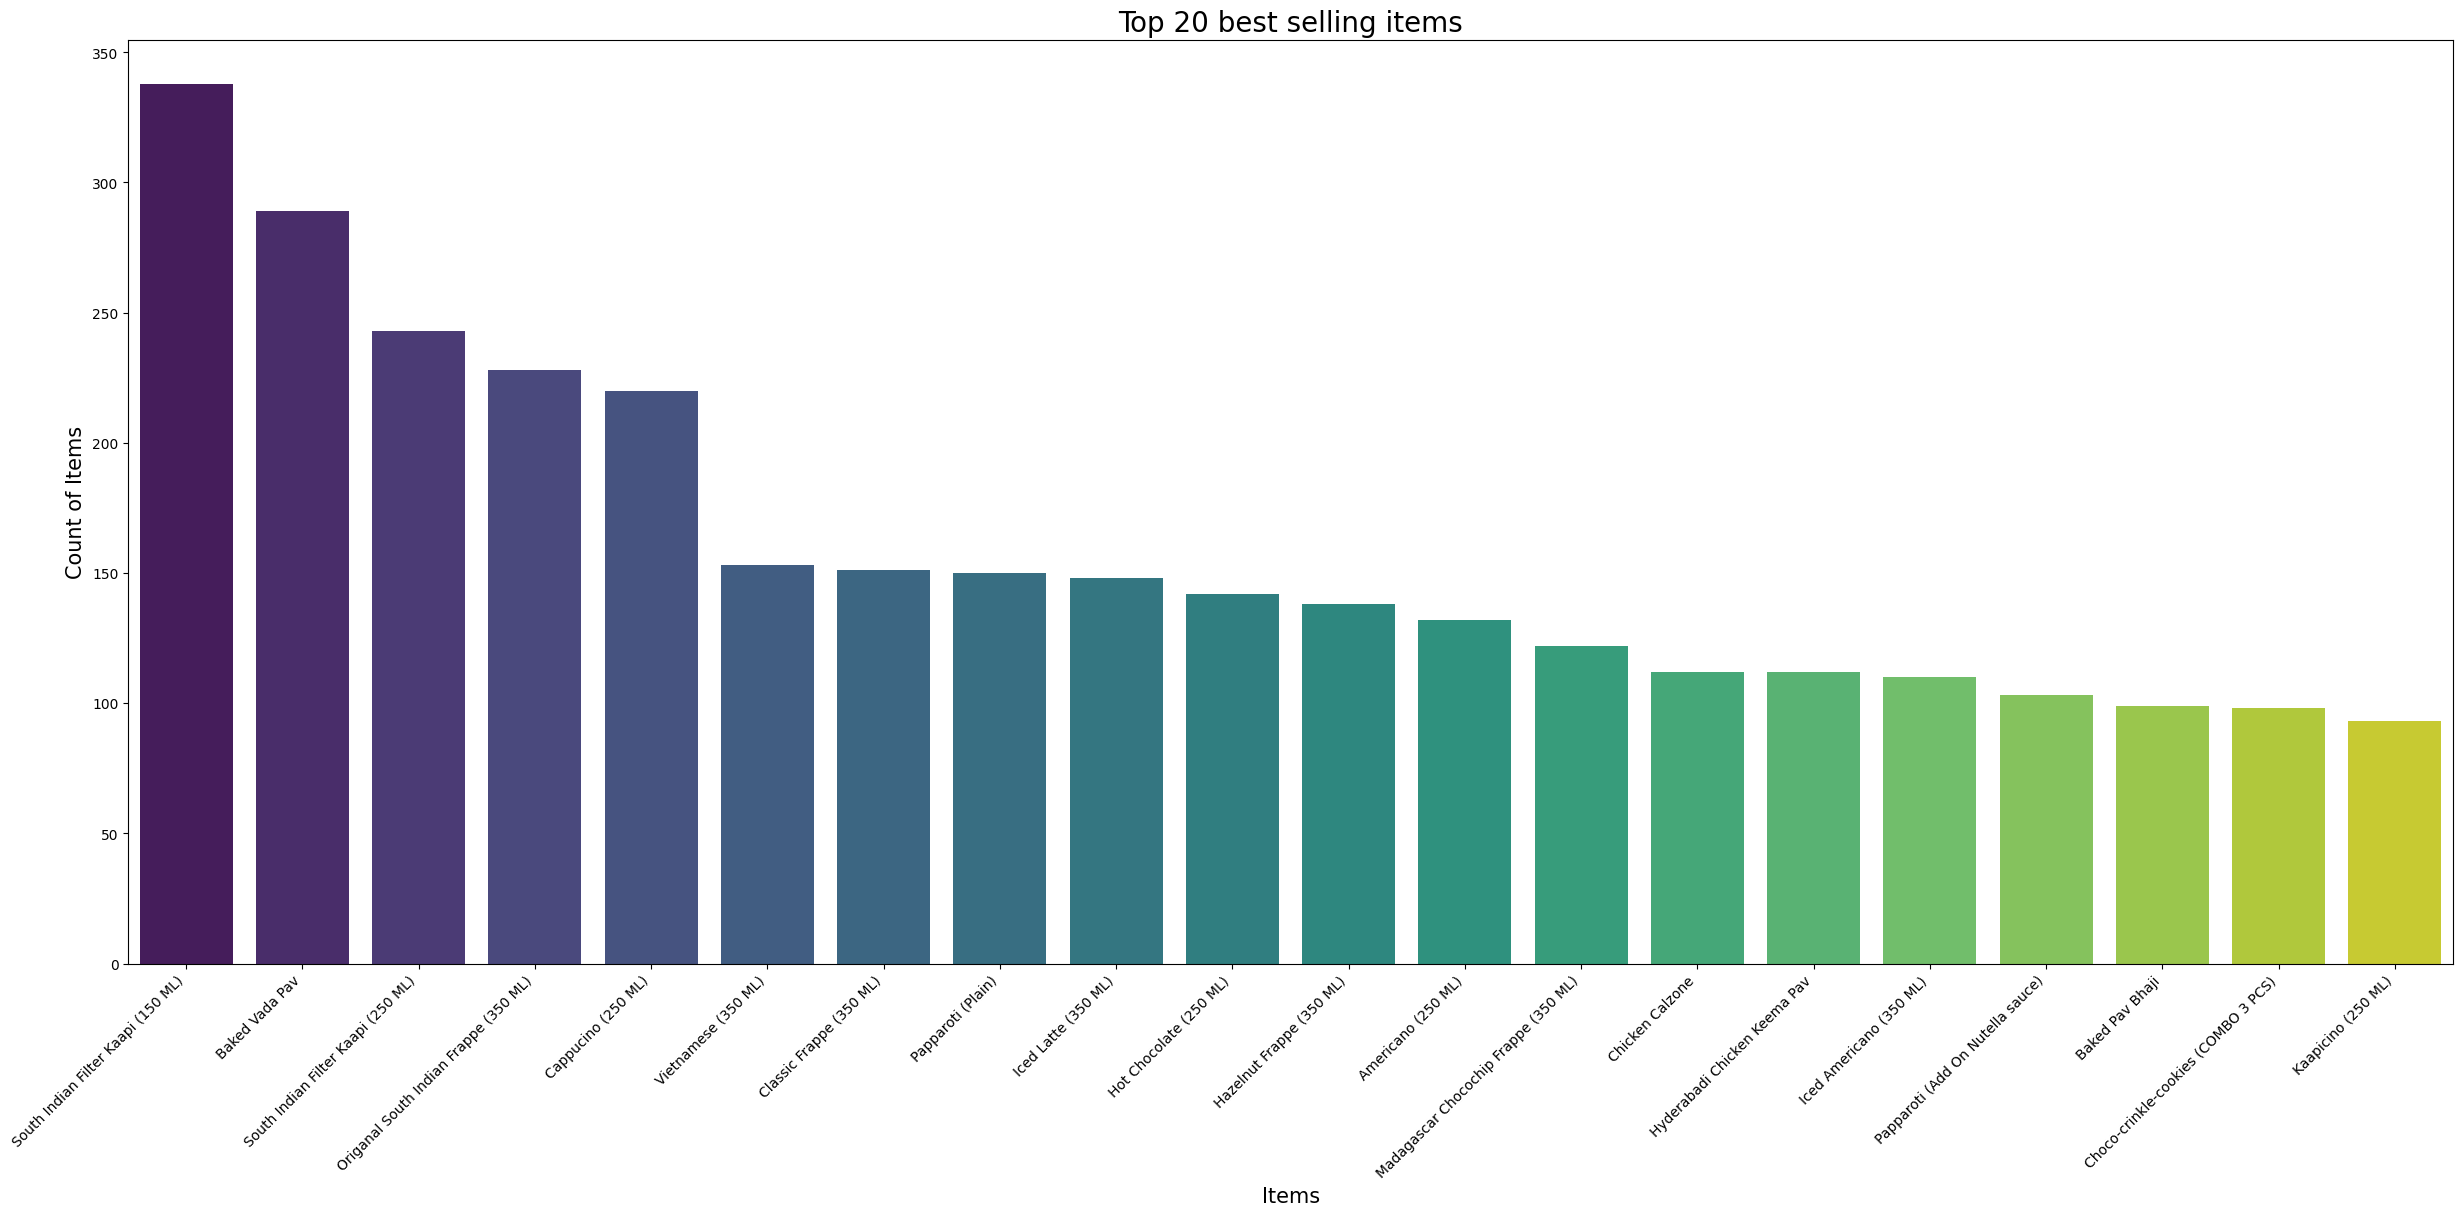

In [30]:
plt.figure(figsize=(30,12))
sns.barplot(x='item', y='count', data=top_items, palette='viridis')
plt.xlabel('Items', size=15)
plt.ylabel('Count of Items', size=15)
plt.title('Top 20 best selling items', size=20)
plt.xticks(rotation=45, ha='right')  # Adjust rotation angle
# plt.xticks(range(0, len(top_items), 2), top_items['item'][::2])  # Display every second label
plt.show()

this

In [31]:
df2.head()

,Date,Timestamp,Item_Name,Weekend_Weekday,Period,Transaction
5577,2024-01-01,2024-01-01 02:44:21,Papparoti (Plain),Monday,Morning,1
5578,2024-01-01,2024-01-01 02:44:21,Gluten Free Hazelnut Brownie,Monday,Morning,1
5576,2024-01-01,2024-01-01 02:44:21,Berliner Mix 3 Pcs (Blueberry Cheese Cake Berl...,Monday,Morning,1
5575,2024-01-01,2024-01-01 02:44:21,Berliner Mix 3 Pcs (Lotus Biscoff Berliner),Monday,Morning,1
5574,2024-01-01,2024-01-01 02:50:49,Yellow Banana Chips 60 Gm,Monday,Morning,2


In [32]:
df2.head()

,Date,Timestamp,Item_Name,Weekend_Weekday,Period,Transaction
5577,2024-01-01,2024-01-01 02:44:21,Papparoti (Plain),Monday,Morning,1
5578,2024-01-01,2024-01-01 02:44:21,Gluten Free Hazelnut Brownie,Monday,Morning,1
5576,2024-01-01,2024-01-01 02:44:21,Berliner Mix 3 Pcs (Blueberry Cheese Cake Berl...,Monday,Morning,1
5575,2024-01-01,2024-01-01 02:44:21,Berliner Mix 3 Pcs (Lotus Biscoff Berliner),Monday,Morning,1
5574,2024-01-01,2024-01-01 02:50:49,Yellow Banana Chips 60 Gm,Monday,Morning,2


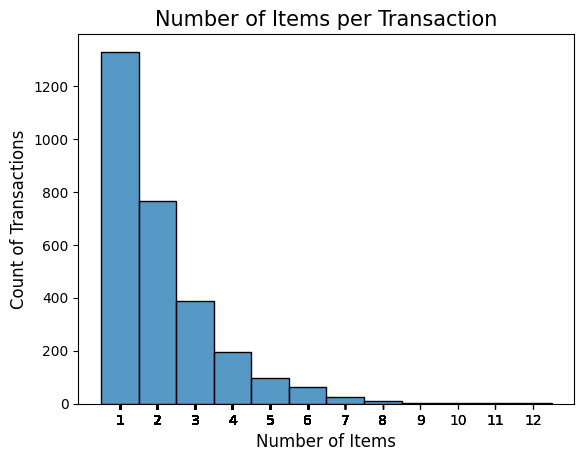

In [33]:
# count the number of items of each transaction
items_num = df2.groupby('Transaction', as_index=False)['Item_Name'].count()

# create histogram plot showing the distribution of transactions by the number of items per transaction
ax = sns.histplot(data= items_num, x='Item_Name', discrete=True)
plt.xlabel('Number of Items', size = 12)
ax.set(xticks=items_num['Item_Name'].values)
plt.ylabel('Count of Transactions', size = 12)
plt.title('Number of Items per Transaction', size = 15)
plt.show()

In [34]:
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

# extracting date
df2['date'] = df2['Timestamp'].dt.date

# extracting hour
df2['hour'] = df2['Timestamp'].dt.hour

#extracting weekday
df2['weekday'] = df2['Timestamp'].dt.strftime('%A')

# extracting month and display full name of the month
df2['month'] = df2['Timestamp'].dt.strftime('%Y-%m')

In [35]:
df2.head()

,Date,Timestamp,Item_Name,Weekend_Weekday,Period,Transaction,date,hour,weekday,month
5577,2024-01-01,2024-01-01 02:44:21,Papparoti (Plain),Monday,Morning,1,2024-01-01,2,Monday,2024-01
5578,2024-01-01,2024-01-01 02:44:21,Gluten Free Hazelnut Brownie,Monday,Morning,1,2024-01-01,2,Monday,2024-01
5576,2024-01-01,2024-01-01 02:44:21,Berliner Mix 3 Pcs (Blueberry Cheese Cake Berl...,Monday,Morning,1,2024-01-01,2,Monday,2024-01
5575,2024-01-01,2024-01-01 02:44:21,Berliner Mix 3 Pcs (Lotus Biscoff Berliner),Monday,Morning,1,2024-01-01,2,Monday,2024-01
5574,2024-01-01,2024-01-01 02:50:49,Yellow Banana Chips 60 Gm,Monday,Morning,2,2024-01-01,2,Monday,2024-01


In [36]:
df2 = df2.drop('date', axis=1, errors='ignore')
df2.head()

,Date,Timestamp,Item_Name,Weekend_Weekday,Period,Transaction,hour,weekday,month
5577,2024-01-01,2024-01-01 02:44:21,Papparoti (Plain),Monday,Morning,1,2,Monday,2024-01
5578,2024-01-01,2024-01-01 02:44:21,Gluten Free Hazelnut Brownie,Monday,Morning,1,2,Monday,2024-01
5576,2024-01-01,2024-01-01 02:44:21,Berliner Mix 3 Pcs (Blueberry Cheese Cake Berl...,Monday,Morning,1,2,Monday,2024-01
5575,2024-01-01,2024-01-01 02:44:21,Berliner Mix 3 Pcs (Lotus Biscoff Berliner),Monday,Morning,1,2,Monday,2024-01
5574,2024-01-01,2024-01-01 02:50:49,Yellow Banana Chips 60 Gm,Monday,Morning,2,2,Monday,2024-01


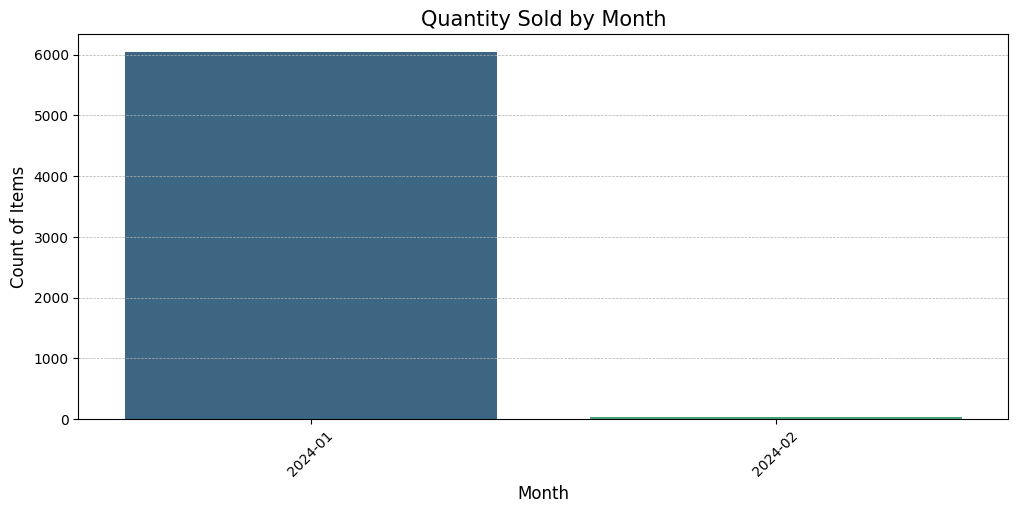

In [37]:
# count the quantity of items sold by month and year
qty_month = df2.groupby('month', as_index=False)['Transaction'].count()
qty_month.head()

# create bar plot showing the number of items sold by month
plt.figure(figsize=(12,5))
sns.barplot(x = 'month', y = 'Transaction', data = qty_month, palette = 'viridis')
plt.xlabel('Month', size = 12)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 12)
plt.title('Quantity Sold by Month', size = 15)
plt.grid(axis = 'y', ls='--', lw='0.5')
plt.show()

In [38]:
# count the number of transactions by days of week, reorder by names of the days
qty_wd = df2.groupby('weekday', as_index=False)['Transaction'].count()
qty_wd['weekday'] = pd.Categorical(qty_wd['weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' ,'Saturday', 'Sunday'], ordered=True)
qty_wd.sort_values("weekday", inplace=True)
qty_wd


,weekday,Transaction
1,Monday,789
5,Tuesday,806
6,Wednesday,876
4,Thursday,741
0,Friday,793
2,Saturday,990
3,Sunday,1080


In [39]:
qty_wd.to_csv('qty_wd.csv', index=False)
from google.colab import files
files.download('qty_wd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

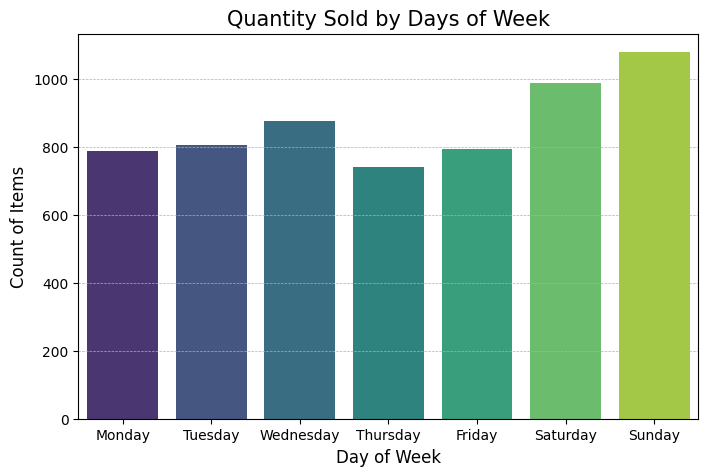

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'weekday', y = 'Transaction', data = qty_wd, palette = 'viridis')
plt.xlabel('Day of Week', size = 12)
plt.ylabel('Count of Items', size = 12)
plt.title('Quantity Sold by Days of Week', size = 15)
plt.grid(axis = 'y', ls='--', lw='0.5')
plt.show()

thiss

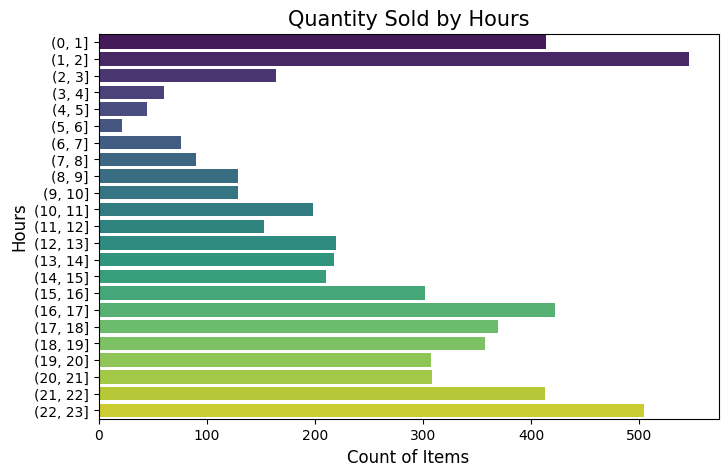

In [41]:
qty_hr = df2.groupby('hour', as_index=False)['Transaction'].count()
qty_hr['hour_bins'] = pd.cut(x=qty_hr.hour, bins = range(0,24,1))
qty_hr.head()

# visualize the distribution of items sold quantity by hours
plt.figure(figsize=(8,5))
sns.barplot(x = 'Transaction', y = 'hour_bins', data = qty_hr, palette = 'viridis')
plt.xlabel('Count of Items', size = 12)
plt.ylabel('Hours', size = 12)
plt.title('Quantity Sold by Hours', size = 15)
plt.show()

In [42]:
qty_hr.to_csv('qty_hr2.csv', index=False)
from google.colab import files
files.download('qty_hr2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

thiisss

In [43]:
# Apply Apriori Algorithm to implement Market Basket Analysis

# select only required variables for modelling
transactions = df2.groupby(['Transaction', 'Item_Name'])['Item_Name'].count().reset_index(name ='Count')
transactions.head()

# The `apriori` function expects input data in a one-hot encoded pandas DataFrame, therefore,
# we need to transform the dataframe above into the representation of categorical variables as binary vectors.

# first create a mxn matrice where m=transaction and n=items
# each row represents whether the items was in a specific transaction or not (>=1 returns True (1), 0 returns 0)
my_basket = transactions.pivot_table(index='Transaction', columns='Item_Name', values='Count', aggfunc='any').fillna(0)

my_basket.head()

# create frequent items df with itemsets and support columns by using `apriori` function
frequent_items = apriori(my_basket, min_support = 0.01, use_colnames = True)
frequent_items

# create the rules from frequent itemset generated above with min lift = 1.2
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1.2)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.reset_index(drop=True, inplace = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Rosella Jam With Filter Coffee Ganache Macaro...,(Strawberry White Chocolate Ganache With Rosel...,0.019384,0.026999,0.011076,0.571429,21.164835,0.010553,2.270336,0.971585
1,(Strawberry White Chocolate Ganache With Rosel...,(Rosella Jam With Filter Coffee Ganache Macaro...,0.026999,0.019384,0.011076,0.410256,21.164835,0.010553,1.662784,0.979189
2,(Baked Pav Bhaji),(Baked Vada Pav),0.033576,0.096919,0.013499,0.402062,4.148417,0.010245,1.510325,0.785312
3,(Calzones Veg (Calzone Paneer)),(Baked Vada Pav),0.029076,0.096919,0.010730,0.369048,3.807781,0.007912,1.431298,0.759462
4,(Baked Vada Pav),(Baked Pav Bhaji),0.096919,0.033576,0.013499,0.139286,4.148417,0.010245,1.122817,0.840395


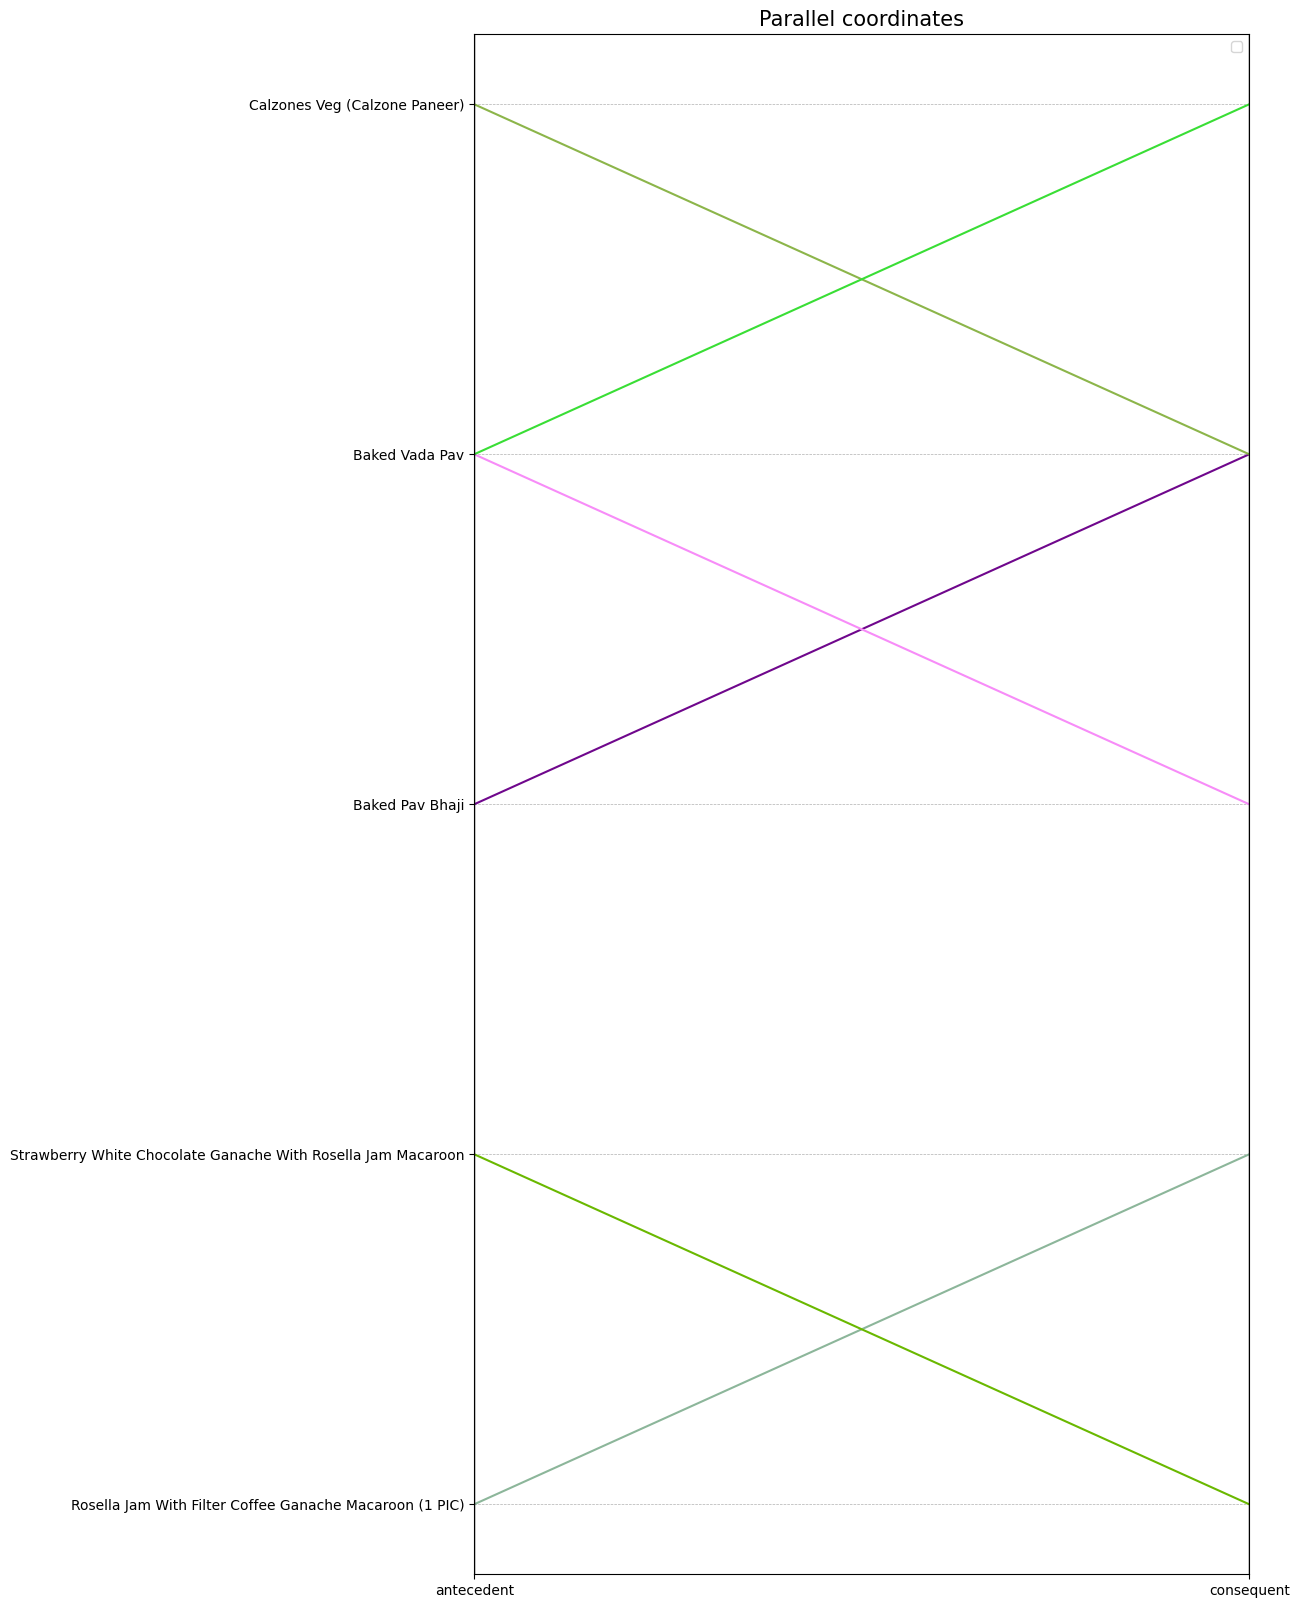

In [44]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

# import sub lib to plot parallel coordinates
from pandas.plotting import parallel_coordinates

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
plt.figure(figsize=(10,20))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(ls='--', lw='0.5')
plt.title('Parallel coordinates', size = 15)
plt.show()


In [45]:
# Count occurrences of each unique pair of products
product_pairs = rules.groupby(['antecedent', 'consequent']).size().reset_index(name='count')

# Sort the pairs based on count in descending order
most_bought_together = product_pairs.sort_values(by='count', ascending=False)

# Display the top 10 most bought together product pairs
top_10_most_bought_together = most_bought_together.head(10)
print(top_10_most_bought_together[['antecedent', 'consequent']])


                                          antecedent  \
0                                    Baked Pav Bhaji   
1                                     Baked Vada Pav   
2                                     Baked Vada Pav   
3                      Calzones Veg (Calzone Paneer)   
4  Rosella Jam With Filter Coffee Ganache Macaroo...   
5  Strawberry White Chocolate Ganache With Rosell...   

                                          consequent  
0                                     Baked Vada Pav  
1                                    Baked Pav Bhaji  
2                      Calzones Veg (Calzone Paneer)  
3                                     Baked Vada Pav  
4  Strawberry White Chocolate Ganache With Rosell...  
5  Rosella Jam With Filter Coffee Ganache Macaroo...  


In [46]:
rules_copy = rules.copy()
columns_to_keep = ['antecedent','consequent','rule']

# Drop columns
columns_to_drop = set(rules_copy.columns) - set(columns_to_keep)
rules_copy.drop(columns=columns_to_drop, inplace=True)

rules_copy.head()

,antecedent,consequent,rule
0,Rosella Jam With Filter Coffee Ganache Macaroo...,Strawberry White Chocolate Ganache With Rosell...,0
1,Strawberry White Chocolate Ganache With Rosell...,Rosella Jam With Filter Coffee Ganache Macaroo...,1
2,Baked Pav Bhaji,Baked Vada Pav,2
3,Calzones Veg (Calzone Paneer),Baked Vada Pav,3
4,Baked Vada Pav,Baked Pav Bhaji,4


In [47]:
rules_copy.to_csv('parallel.csv', index=False)
from google.colab import files
files.download('parallel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

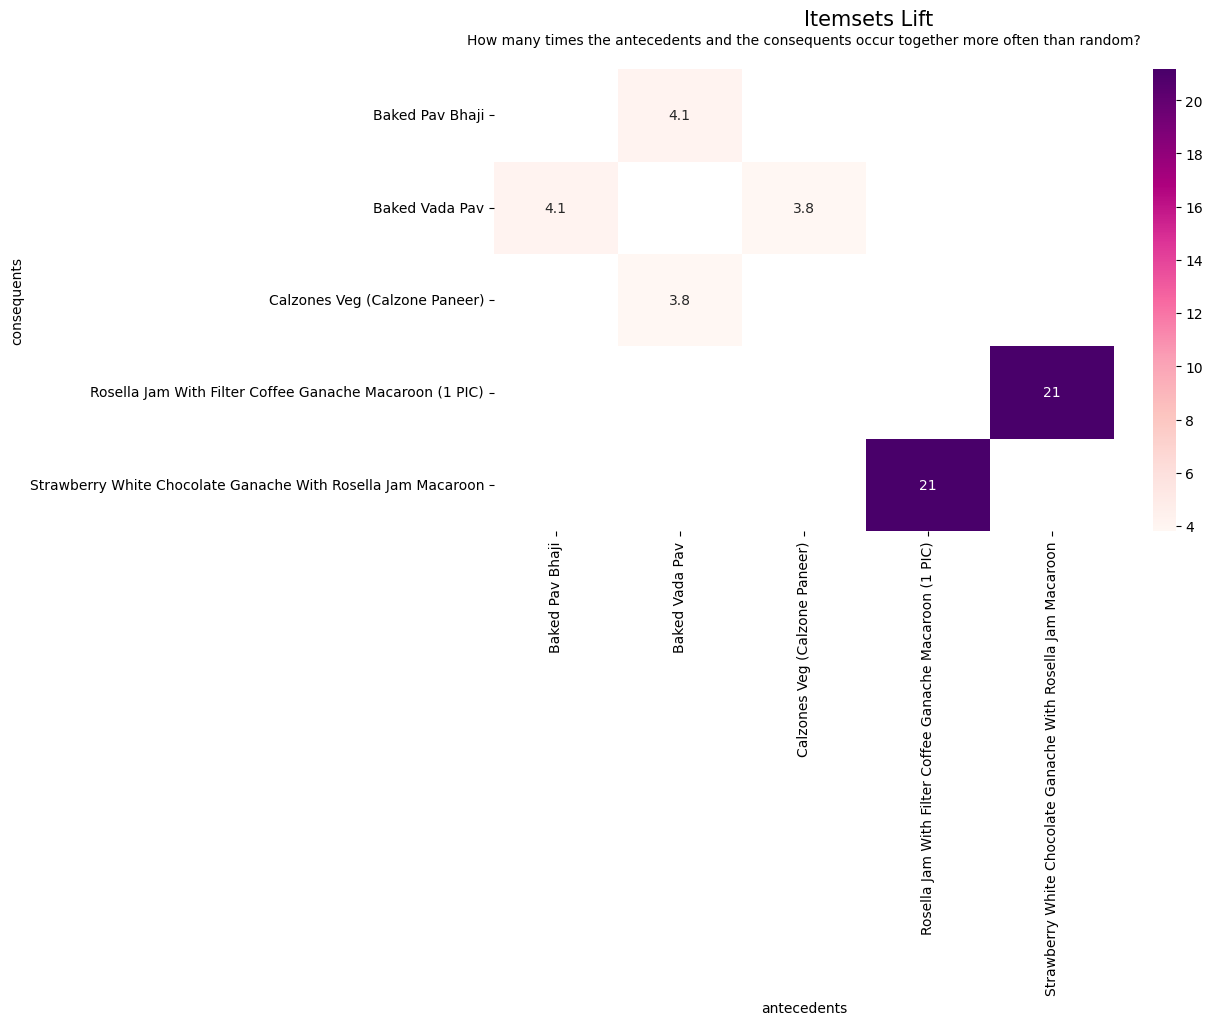

In [48]:
# Itemsets Lift Heatmap

# convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# transform antecedent, consequent, and support columns into matrix
support_table_lift = rules.pivot(index='consequents', columns='antecedents', values='lift')

# generate a heatmap with annotations
plt.figure(figsize=(10,6))
sns.heatmap(support_table_lift, annot = True, cbar = True, cmap="RdPu")
plt.suptitle('Itemsets Lift', size = 15)
plt.title('How many times the antecedents and the consequents occur together more often than random?\n', size=10)
plt.show()

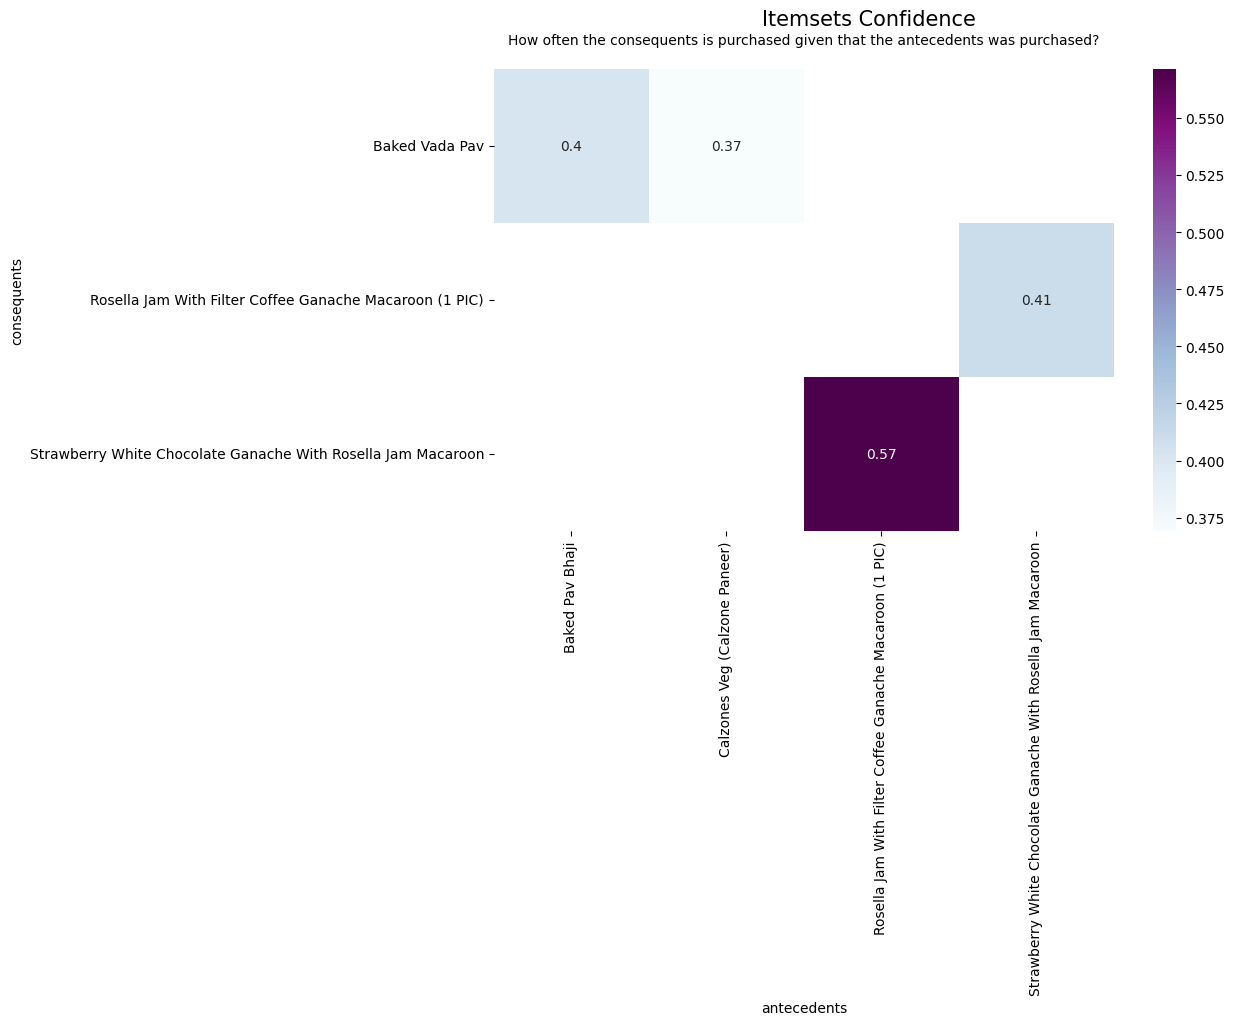

In [49]:
# Itemsets Confidence Heatmap

# transform antecedent, consequent, and support columns into matrix
rules_confidence = rules[rules['confidence']>=0.2] # select min lift=1.2
support_table_conf = rules_confidence.pivot(index='consequents', columns='antecedents', values='confidence')

# generate a heatmap with annotations
plt.figure(figsize=(10,6))
sns.heatmap(support_table_conf, annot = True, cbar = True, cmap="BuPu")
plt.suptitle('Itemsets Confidence', size = 15)
plt.title('How often the consequents is purchased given that the antecedents was purchased?\n', size = 10)
plt.show()

In [52]:
profitability = df.groupby('Item_Name')['Price'].mean()

# Identify the most profitable and less profitable items
most_profitable_items = profitability.nlargest(7)
least_profitable_items = profitability.nsmallest(7)

most_profitable_items, least_profitable_items

(Item_Name
 Combo-original South Indian Frappe 350 ML + Mix Banana Chips    523.81
 Madagascar Chocochip Frappe (450 Ml)                            514.50
 Baba Budan Peak 250 Gm                                          500.00
 Kodai Shroom 250 GM                                             500.00
 Waves Of Malnad 250 GM                                          500.00
 Wild Chikmanglur 250 GM                                         500.00
 Almond Frappe (450 Ml)                                          477.75
 Name: Price, dtype: float64,
 Item_Name
 Mix Tartlet 9 Pcs (Filter Kaapi Tartlet)      28.57
 Mix Tartlet 9 Pcs (Kacha Nimbu Tartlet)       28.57
 Mix Tartlet 9 Pcs (Salted Caramel Tartlet)    28.57
 Mix Tartlet 9 Pcs (chocolate Tartlet)         28.57
 Mix Tartlet 9 Pcs (kodai cheese tartlet)      28.57
 Mix Tartlet 6 Pcs (Filter Kaapi Tartlet)      38.10
 Mix Tartlet 6 Pcs (chocolate Tartlet)         38.10
 Name: Price, dtype: float64)

In [54]:
# Pair the most profitable and least profitable items
pairings = {}
for i in range(7):
    most_profitable_item = most_profitable_items.index[i]
    least_profitable_item = least_profitable_items.index[i]
    pairings[most_profitable_item] = least_profitable_item

pairings

{'Combo-original South Indian Frappe 350 ML + Mix Banana Chips': 'Mix Tartlet 9 Pcs (Filter Kaapi Tartlet)',
 'Madagascar Chocochip Frappe (450 Ml)': 'Mix Tartlet 9 Pcs (Kacha Nimbu Tartlet)',
 'Baba Budan Peak 250 Gm': 'Mix Tartlet 9 Pcs (Salted Caramel Tartlet)',
 'Kodai Shroom 250 GM': 'Mix Tartlet 9 Pcs (chocolate Tartlet)',
 'Waves Of Malnad 250 GM': 'Mix Tartlet 9 Pcs (kodai cheese tartlet)',
 'Wild Chikmanglur 250 GM': 'Mix Tartlet 6 Pcs (Filter Kaapi Tartlet)',
 'Almond Frappe (450 Ml)': 'Mix Tartlet 6 Pcs (chocolate Tartlet)'}